In [101]:
import pandas as pd
import numpy as np
import csv
import random as rd
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('fall2022Placement.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed


In [103]:
# THIS COMES IN AT END
 # here we are reading the dictionary columns to replace the obsecure names in other file
df2 = pd.read_excel('Data dictionary.xlsx')
dataDictionary = {}
for x in df2.itertuples():
    dataDictionary[x.Column] = x.Explanation

df = df.rename(dataDictionary,axis='columns')
df

,Serial Number,Gender (M/F),Secondary Education percentile,Board of Education,Higher Secondary Education percentile,Board of Education- Central/ Others,Specialization in Higher Secondary Education,Degree Percentile,Under Graduation(Degree type),Work Experience,Employability test percentile,Area of speciality,MBA percentile,salary,placed or nor placed (target variable)
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed


<AxesSubplot:>

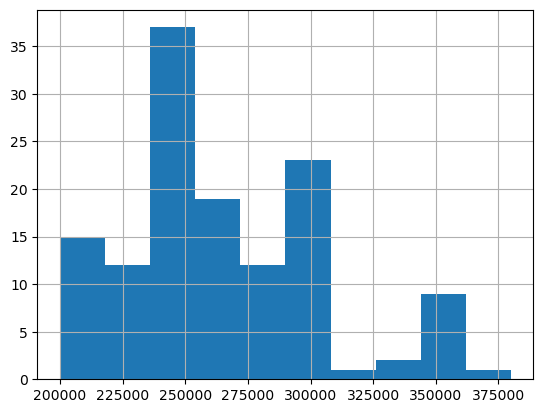

In [108]:
# here we are creating a box of salaries to find outliers
fig = px.box(df, x='salary')
fig.show()
# the resulting grid shows us we have a few outliers that could be due to data entry error AND could just be abnormal circumstances.
# I am going to be doing 2 things
# 1) for the 45k, 2.6m, 3m salaries I am assuming they should be 450k, 260k, 300k respectively and am updating that.
# 2) We will remove salaries outside the whiskers
df['salary'].hist()

In [107]:
# dropping salaries outside whiskers
salaryIndex = df[(df['salary']>380000) | (df['salary']<200000)].index
salaryIndex
df.drop(salaryIndex, inplace=True)

In [105]:
fig = px.box(df, x='salary')
fig.show()
# showing our cleaner data set

In [111]:
df['salary bins'] = pd.cut(df.salary, bins=np.linspace(200000, 380000, 10))
df


,Serial Number,Gender (M/F),Secondary Education percentile,Board of Education,Higher Secondary Education percentile,Board of Education- Central/ Others,Specialization in Higher Secondary Education,Degree Percentile,Under Graduation(Degree type),Work Experience,Employability test percentile,Area of speciality,MBA percentile,salary,placed or nor placed (target variable),salary bins
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed,"(260000.0, 280000.0]"
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed,NaN
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed,"(240000.0, 260000.0]"
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed,NaN
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,NaN,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,216000.0,Placed,"(200000.0, 220000.0]"
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed,"(260000.0, 280000.0]"
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed,"(280000.0, 300000.0]"
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed,"(200000.0, 220000.0]"


In [112]:
# Here we are replacing placed or not placed as a boolean to be able to crunch numbers better

def categorize(row):  
    if row['placed or nor placed (target variable)'] == 'Placed':
        return 1
    else:
        return 0

df['placed status'] = df.apply(lambda row: categorize(row), axis=1)
df


,Serial Number,Gender (M/F),Secondary Education percentile,Board of Education,Higher Secondary Education percentile,Board of Education- Central/ Others,Specialization in Higher Secondary Education,Degree Percentile,Under Graduation(Degree type),Work Experience,Employability test percentile,Area of speciality,MBA percentile,salary,placed or nor placed (target variable),salary bins,placed status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed,"(260000.0, 280000.0]",1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed,NaN,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed,"(240000.0, 260000.0]",1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed,NaN,0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,NaN,Not Placed,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,216000.0,Placed,"(200000.0, 220000.0]",1
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed,"(260000.0, 280000.0]",1
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed,"(280000.0, 300000.0]",1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed,"(200000.0, 220000.0]",1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 214
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Serial Number                                 198 non-null    int64   
 1   Gender (M/F)                                  198 non-null    object  
 2   Secondary Education percentile                198 non-null    float64 
 3   Board of Education                            198 non-null    object  
 4   Higher Secondary Education percentile         197 non-null    float64 
 5   Board of Education- Central/ Others           198 non-null    object  
 6   Specialization in Higher Secondary Education  197 non-null    object  
 7   Degree Percentile                             198 non-null    float64 
 8   Under Graduation(Degree type)                 198 non-null    object  
 9   Work Experience                               198 non-

<AxesSubplot:xlabel='MBA percentile', ylabel='salary'>

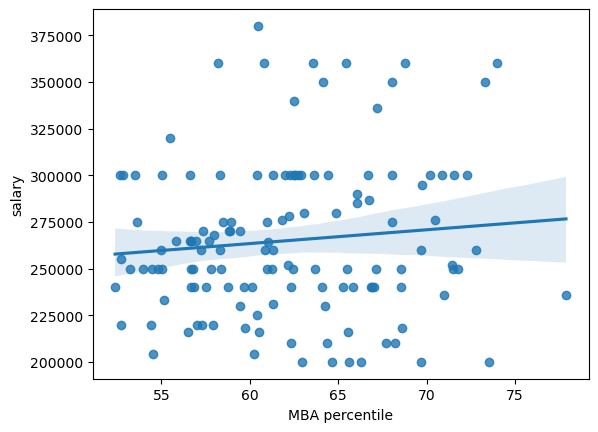

In [99]:
# interesting data set showing very weak correlation between mba percentile and salary
sb.regplot(x=df['MBA percentile'],y=df['salary'],data=df,)


In [118]:
df['salary'].fillna(df['salary'].mean(),inplace=True)

In [121]:
df = 90% , 78%

,Serial Number,Gender (M/F),Secondary Education percentile,Board of Education,Higher Secondary Education percentile,Board of Education- Central/ Others,Specialization in Higher Secondary Education,Degree Percentile,Under Graduation(Degree type),Work Experience,Employability test percentile,Area of speciality,MBA percentile,salary,placed or nor placed (target variable),salary bins,placed status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.000000,Placed,"(260000.0, 280000.0]",1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.000000,Placed,NaN,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.000000,Placed,"(240000.0, 260000.0]",1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,264748.091603,Not Placed,NaN,0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,264748.091603,Not Placed,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,216000.000000,Placed,"(200000.0, 220000.0]",1
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.000000,Placed,"(260000.0, 280000.0]",1
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.000000,Placed,"(280000.0, 300000.0]",1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.000000,Placed,"(200000.0, 220000.0]",1
